In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Task

Develop a CNN to classify EEG signals representing two emotional states (calm and fear).

#### Dataset

Here we analyze EEG recordings from 43 subjects who were shown 25 video stimuli (5 calm, 5 happy, 5 anger, 5 fear, 5 sad – 1 per trial). Data were recorded from 8 electrodes (FP1, FP2, F7, F8, F3, F4, T3, T4, [see the map](https://en.wikipedia.org/wiki/10–20_system_(EEG))) with the sampling rate of 250 Hz.

Since [the original data](https://www.kaggle.com/datasets/israalaith/emoreiq-dataset?resource=download) (open the link to check the description) are in MATLAB format, the analysis will be done on 10 trials (5 calm and 5 fear, trials 1-5 and 16-20 respectively) for patient 28, stored as `calm1.csv`, ..., `calm5.csv` and `fear16.csv` ..., `fear20.csv`.

In [88]:
# Read two datafiles
calm = pd.read_csv('data/calm1.csv', header = None)
fear = pd.read_csv('data/fear16.csv', header = None)

# Set correct column names
calm.columns = ['FP1', 'FP2', 'F7', 'F8', 'F3', 'F4', 'T3', 'T4']
fear.columns = ['FP1', 'FP2', 'F7', 'F8', 'F3', 'F4', 'T3', 'T4']

In [89]:
calm.head()

,FP1,FP2,F7,F8,F3,F4,T3,T4
0,113623.031250,180290.015625,128898.484375,30877.322266,36909.308594,44289.609375,27650.658203,50441.253906
1,113600.406250,180498.578125,128890.070312,30840.810547,36875.980469,44256.046875,27611.833984,50404.105469
2,113573.210938,180534.765625,128877.625000,30801.617188,36837.425781,44210.917969,27578.505859,50369.875000
3,113548.164062,180416.578125,128857.007812,30777.812500,36812.078125,44174.406250,27558.859375,50351.066406
4,113526.007812,180334.031250,128835.250000,30763.093750,36798.031250,44154.726562,27545.750000,50339.230469


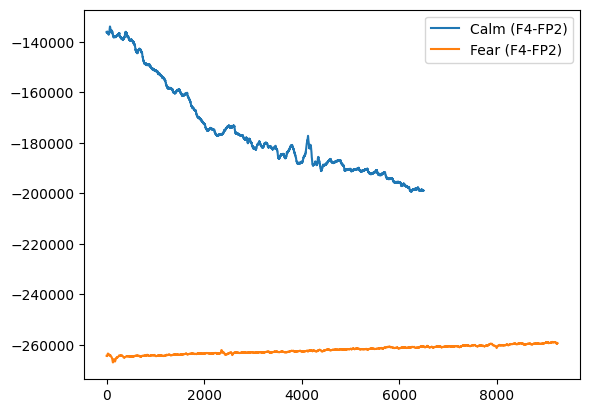

In [90]:
plt.plot(calm['F4'] - calm['FP2'], label = "Calm (F4-FP2)")
plt.plot(fear['F4'] - fear['FP2'], label = "Fear (F4-FP2)")
plt.legend()

#### Instructions

**Part 1 – Preprocessing**

1. Use data only from electrode F4. 
2. EEG data are typically referenced, i.e., data for each electrode are represented as a difference in voltage with some other electrode ([see details](https://en.wikipedia.org/wiki/Electroencephalography#Method)). We will use a simple sequential reference with electrode FP2. For each trial separately, subtract the values of FP2 from the values of FP4 (see example above).
3. To construct the train-test dataset, cut the recordings in clips of fixed length (e.g., 2 seconds, do not forget to take the sampling rate into account). Use these clips as observations, i.e., the shape of the dataset should be (N clips) x (Clip duration). Assign a target label for each clip based on the trial's label.

**Part 2 – Model training**
1. Train a CNN to predict the label (calm vs fear) from EEG clips. 